Name: Carlos Constante

In [139]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
#Loading dataframe
sal = pd.read_csv('NYC_Payroll_Data_Fiscal_Year.csv')
sal

In [6]:
#Check the dataframe columns' names
sal.columns

Index(['Fiscal Year', 'Payroll Number', 'Agency Name', 'Last Name',
       'First Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough',
       'Title Description', 'Leave Status as of June 30', 'Base Salary',
       'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours',
       'Total OT Paid', 'Total Other Pay'],
      dtype='object')

In [7]:
#check the dataframe information
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469657 entries, 0 to 1469656
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Fiscal Year                 1469657 non-null  int64  
 1   Payroll Number              1469657 non-null  int64  
 2   Agency Name                 1469657 non-null  object 
 3   Last Name                   1468753 non-null  object 
 4   First Name                  1468742 non-null  object 
 5   Mid Init                    866071 non-null   object 
 6   Agency Start Date           1469616 non-null  object 
 7   Work Location Borough       1469651 non-null  object 
 8   Title Description           1469623 non-null  object 
 9   Leave Status as of June 30  1469657 non-null  object 
 10  Base Salary                 1469657 non-null  float64
 11  Pay Basis                   1469657 non-null  object 
 12  Regular Hours               1469657 non-null  float64
 1

In [8]:
#check for missing data in each numeric types column
sal.describe()

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06
mean,2.018996e+03,5.563574e+02,4.681239e+04,7.432658e+02,4.964219e+04,7.081650e+01,3.772085e+03,3.205983e+03
std,8.130180e-01,3.090461e+02,4.388318e+04,9.178171e+02,4.141916e+04,1.656371e+02,9.570726e+03,5.980867e+03
min,2.018000e+03,2.000000e+00,1.000000e+00,-2.352500e+02,-2.343844e+04,-2.100000e+01,-2.649388e+04,-1.548196e+05
25%,2.018000e+03,3.000000e+02,3.318000e+01,0.000000e+00,7.388030e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,7.420000e+02,4.497500e+04,0.000000e+00,4.529081e+04,0.000000e+00,0.000000e+00,1.650000e+01
75%,2.020000e+03,7.470000e+02,8.529200e+04,1.820000e+03,8.418630e+04,1.475000e+01,6.280900e+02,4.129790e+03
max,2.020000e+03,9.960000e+02,4.147070e+05,4.160000e+03,3.685975e+05,3.147000e+03,2.373897e+05,2.222470e+05


In [9]:
#Decribe the string types columns in the dataframe
sal.describe(include = ["O"])

,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Pay Basis
count,1469657,1468753,1468742,866071,1469616,1469651,1469623,1469657,1469657
unique,155,119034,65155,35,12994,18,1570,1,4
top,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,A,01/01/2010,MANHATTAN,TEACHER- PER SESSION,ACTIVE,per Annum
freq,285125,9397,22282,130531,29345,1050354,233441,1469657,898331


In [117]:
sal['Pay Basis'].value_counts()

per Annum          898331
per Day            329908
per Hour           235858
Prorated Annual      5560
Name: Pay Basis, dtype: int64

In [10]:
#create a dataframe with only rows missing at least one value
sal.isna().any(axis = 1)

0           True
1          False
2           True
3          False
4          False
           ...  
1469652    False
1469653     True
1469654    False
1469655    False
1469656    False
Length: 1469657, dtype: bool

In [11]:
#Create a filter with all rows that contain at least one missing data
nan_filter = sal.isna().any(axis = 1)
sal[nan_filter]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.00,84698.21,0.00,0.00,0.00
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.00,84698.21,0.00,0.00,0.00
6,2020,17,OFFICE OF EMERGENCY MANAGEMENT,VAZQUEZ,MARGARET,NaN,09/29/2008,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,94415.0,per Annum,1820.00,84312.72,0.00,0.00,0.00
9,2020,17,OFFICE OF EMERGENCY MANAGEMENT,DE LOS SANTOS,JANIRA,NaN,06/05/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,67676.0,per Annum,1820.00,66647.77,348.50,16572.64,144.15
13,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILLIAMS,LATOYA,NaN,02/16/2005,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,73403.0,per Annum,1820.00,72287.70,217.75,9636.04,258.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469646,2019,56,POLICE DEPARTMENT,MIKHNO,INNA,NaN,07/02/2018,BROOKLYN,POLICE OFFICER,ACTIVE,42500.0,per Annum,2000.00,41568.57,46.23,1461.04,3659.52
1469648,2019,56,POLICE DEPARTMENT,ISLAM,A B M KAMRUL,NaN,05/31/2017,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,38986.0,per Annum,2040.00,39447.39,717.75,20914.83,1336.10
1469649,2019,56,POLICE DEPARTMENT,CASTRO VASQUEZ,ADISON,NaN,07/22/2016,BRONX,SCHOOL CROSSING GUARD,ACTIVE,15.0,per Hour,952.65,15909.71,0.00,0.00,213.00
1469650,2019,56,POLICE DEPARTMENT,JALLIM,ALISEN,NaN,01/16/2018,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,38986.0,per Annum,2040.00,38673.46,172.25,5281.94,3740.94


In [12]:
#create a dataframe with only rows missing at least one value in Mid Init column
missing_rows = sal['Mid Init'].isna()
missing_rows

0           True
1          False
2           True
3          False
4          False
           ...  
1469652    False
1469653     True
1469654    False
1469655    False
1469656    False
Name: Mid Init, Length: 1469657, dtype: bool

In [13]:
#Checking the dataframe with missing values in the Mid Init column
sal[missing_rows]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.00,84698.21,0.00,0.00,0.00
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.00,84698.21,0.00,0.00,0.00
6,2020,17,OFFICE OF EMERGENCY MANAGEMENT,VAZQUEZ,MARGARET,NaN,09/29/2008,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,94415.0,per Annum,1820.00,84312.72,0.00,0.00,0.00
9,2020,17,OFFICE OF EMERGENCY MANAGEMENT,DE LOS SANTOS,JANIRA,NaN,06/05/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,67676.0,per Annum,1820.00,66647.77,348.50,16572.64,144.15
13,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILLIAMS,LATOYA,NaN,02/16/2005,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,73403.0,per Annum,1820.00,72287.70,217.75,9636.04,258.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469646,2019,56,POLICE DEPARTMENT,MIKHNO,INNA,NaN,07/02/2018,BROOKLYN,POLICE OFFICER,ACTIVE,42500.0,per Annum,2000.00,41568.57,46.23,1461.04,3659.52
1469648,2019,56,POLICE DEPARTMENT,ISLAM,A B M KAMRUL,NaN,05/31/2017,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,38986.0,per Annum,2040.00,39447.39,717.75,20914.83,1336.10
1469649,2019,56,POLICE DEPARTMENT,CASTRO VASQUEZ,ADISON,NaN,07/22/2016,BRONX,SCHOOL CROSSING GUARD,ACTIVE,15.0,per Hour,952.65,15909.71,0.00,0.00,213.00
1469650,2019,56,POLICE DEPARTMENT,JALLIM,ALISEN,NaN,01/16/2018,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,38986.0,per Annum,2040.00,38673.46,172.25,5281.94,3740.94


This exploratory analysis shows that in the column 'Mid Init' there are 603,586 rows with missing data out of the total rows with missing data 603,610. Therefore with can delete this column. Moreover, columns 'Leave Status as of June 30' & 'Payroll Number' are no needed for this analysis, therefore they will be deleted as well.

In [14]:
#Delete the column "Mid Init","Leave Status as of June 30" & 'Payroll Number'
del sal['Mid Init']
del sal['Leave Status as of June 30'] 
del sal['Payroll Number'] 
sal

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,LUNGAYAN JR.,HERMAN,05/28/2014,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91
1469653,2019,POLICE DEPARTMENT,HORNE,JONISHAU,02/20/2018,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55
1469654,2019,POLICE DEPARTMENT,HIRA,ABDUL,09/25/2017,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37
1469655,2019,POLICE DEPARTMENT,KARAI,WAHID,02/23/2016,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69


In [15]:
#get info about the 14 columns left
sal.describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.469657e+06,1469657,1468753,1468742,1469616,1469651,1469623,1.469657e+06,1469657,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06,1.469657e+06
unique,NaN,155,119034,65155,12994,18,1570,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,01/01/2010,MANHATTAN,TEACHER- PER SESSION,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,285125,9397,22282,29345,1050354,233441,NaN,898331,NaN,NaN,NaN,NaN,NaN
mean,2.018996e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.681239e+04,NaN,7.432658e+02,4.964219e+04,7.081650e+01,3.772085e+03,3.205983e+03
std,8.130180e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.388318e+04,NaN,9.178171e+02,4.141916e+04,1.656371e+02,9.570726e+03,5.980867e+03
min,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,-2.352500e+02,-2.343844e+04,-2.100000e+01,-2.649388e+04,-1.548196e+05
25%,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,7.388030e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.497500e+04,NaN,0.000000e+00,4.529081e+04,0.000000e+00,0.000000e+00,1.650000e+01
75%,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,8.529200e+04,NaN,1.820000e+03,8.418630e+04,1.475000e+01,6.280900e+02,4.129790e+03


In [16]:
#Creating a new filter for missing values for the 14 columns left
nan_filter = sal.isna().any(axis = 1)
sal[nan_filter]

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
114216,2020,BOARD OF ELECTION POLL WORKERS,FEUCHT,NaN,01/01/2019,MANHATTAN,ELECTION WORKER,1.0,per Hour,0.0,3995.00,0.0,0.00,0.00
128167,2020,BOARD OF ELECTION POLL WORKERS,NaN,YOUN,01/01/2018,MANHATTAN,ELECTION WORKER,1.0,per Hour,0.0,525.00,0.0,0.00,0.00
140336,2020,DEPT OF ED PEDAGOGICAL,COLEMAN,KAWANA,07/01/1982,NaN,TEACHER SPECIAL EDUCATION,124909.0,per Annum,0.0,122242.80,0.0,0.00,26460.23
235224,2020,BOARD OF ELECTION POLL WORKERS,NaN,DANIEL,01/01/2019,MANHATTAN,ELECTION WORKER,1.0,per Hour,0.0,350.00,0.0,0.00,0.00
235225,2020,BOARD OF ELECTION POLL WORKERS,NaN,MIJEAN,01/01/2019,MANHATTAN,ELECTION WORKER,1.0,per Hour,0.0,350.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404519,2019,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,06/11/2018,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,63049.0,per Annum,2040.0,64442.53,0.0,0.00,3626.43
1404520,2019,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,06/11/2018,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,63012.0,per Annum,2040.0,64407.84,0.0,0.00,3626.43
1404540,2019,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,09/04/2018,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,65000.0,per Annum,1672.0,53106.98,0.0,0.00,16.50
1404564,2019,DISTRICT ATTORNEY-SPECIAL NARC,NaN,NaN,04/01/2019,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,65000.0,per Annum,480.0,14958.90,0.0,0.00,251.38


There were 938 rows with missing data such as 'First name', 'Lastname', 'Agency Start Date', 'Work Location Borough', and 'Title Description'. Those rows will be dropped. This could be possibly human errors while entering the data.

In [17]:
sal[nan_filter].describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,938.000000,938,34,23,897,932,904,938.000000,938,938.000000,938.000000,938.000000,938.000000,938.000000
unique,NaN,15,13,10,288,5,22,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,DISTRICT ATTORNEY-MANHATTAN,XU,BRUCE,01/09/2017,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,251,6,3,10,331,407,NaN,920,NaN,NaN,NaN,NaN,NaN
mean,2018.989339,NaN,NaN,NaN,NaN,NaN,NaN,74848.996962,NaN,1910.463731,73130.904051,164.050640,8657.375299,5624.295085
std,0.813371,NaN,NaN,NaN,NaN,NaN,NaN,22249.579315,NaN,426.280148,24170.137307,214.686179,11454.590988,5690.216186
min,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,250.000000,0.000000,0.000000,0.000000
25%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,62751.500000,NaN,2040.000000,63400.160000,3.000000,181.660000,855.640000
50%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,70000.000000,NaN,2045.720000,70527.215000,74.250000,3639.155000,3915.440000
75%,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,84818.000000,NaN,2080.000000,83949.750000,262.125000,13537.505000,9049.675000


In [18]:
#Removing rows with missing values and creating a new dataframe
sal2 = sal.dropna()
sal2

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,LUNGAYAN JR.,HERMAN,05/28/2014,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91
1469653,2019,POLICE DEPARTMENT,HORNE,JONISHAU,02/20/2018,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55
1469654,2019,POLICE DEPARTMENT,HIRA,ABDUL,09/25/2017,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37
1469655,2019,POLICE DEPARTMENT,KARAI,WAHID,02/23/2016,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69


In [19]:
#Describing all columns in new dataframe
sal2.describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.468719e+06,1468719,1468719,1468719,1468719,1468719,1468719,1.468719e+06,1468719,1.468719e+06,1.468719e+06,1.468719e+06,1.468719e+06,1.468719e+06
unique,NaN,155,119033,65153,12993,18,1563,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,01/01/2010,MANHATTAN,TEACHER- PER SESSION,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,285121,9397,22282,29345,1050023,233441,NaN,897411,NaN,NaN,NaN,NaN,NaN
mean,2.018996e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.679449e+04,NaN,7.425204e+02,4.962718e+04,7.075696e+01,3.768965e+03,3.204439e+03
std,8.130180e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.388787e+04,NaN,9.175727e+02,4.142363e+04,1.655844e+02,9.568612e+03,5.980738e+03
min,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,-2.352500e+02,-2.343844e+04,-2.100000e+01,-2.649388e+04,-1.548196e+05
25%,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,7.368430e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.497500e+04,NaN,0.000000e+00,4.526054e+04,0.000000e+00,0.000000e+00,1.650000e+01
75%,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,8.529200e+04,NaN,1.820000e+03,8.418765e+04,1.450000e+01,6.197500e+02,4.123980e+03


In [20]:
#check the job titles in this dataframe
sal2['Work Location Borough'].value_counts()

MANHATTAN        1050023
QUEENS            164518
BROOKLYN          135857
BRONX              74745
RICHMOND           20552
OTHER              19471
WESTCHESTER         1550
ULSTER               936
SULLIVAN             362
DELAWARE             243
PUTNAM               114
NASSAU               101
SCHOHARIE             84
DUTCHESS              68
ALBANY                43
GREENE                30
WASHINGTON DC         19
ORANGE                 3
Name: Work Location Borough, dtype: int64

In [21]:
# Filtering the dataframe 'Work Location' with Manhattan, Queens, Brooklyn and Bronx
sal3 = sal2[sal2['Work Location Borough'].isin(['MANHATTAN','QUEENS','BROOKLYN','BRONX'])]
sal3

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,LUNGAYAN JR.,HERMAN,05/28/2014,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91
1469653,2019,POLICE DEPARTMENT,HORNE,JONISHAU,02/20/2018,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55
1469654,2019,POLICE DEPARTMENT,HIRA,ABDUL,09/25/2017,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37
1469655,2019,POLICE DEPARTMENT,KARAI,WAHID,02/23/2016,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69


In [22]:
sal3.describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.425143e+06,1425143,1425143,1425143,1425143,1425143,1425143,1.425143e+06,1425143,1.425143e+06,1.425143e+06,1.425143e+06,1.425143e+06,1.425143e+06
unique,NaN,149,117235,64700,12921,4,1537,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,01/01/2010,MANHATTAN,TEACHER- PER SESSION,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,265655,9236,21079,29345,1050023,233441,NaN,857981,NaN,NaN,NaN,NaN,NaN
mean,2.018998e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.554316e+04,NaN,7.347325e+02,4.833214e+04,6.953900e+01,3.691300e+03,3.123824e+03
std,8.129267e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.332212e+04,NaN,9.151047e+02,4.077300e+04,1.644188e+02,9.469556e+03,5.896730e+03
min,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,-2.352500e+02,-2.343844e+04,-2.100000e+01,-2.649388e+04,-1.548196e+05
25%,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,6.671615e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.405200e+04,NaN,0.000000e+00,4.421395e+04,0.000000e+00,0.000000e+00,1.257000e+01
75%,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,8.401250e+04,NaN,1.820000e+03,8.283452e+04,1.125000e+01,5.083850e+02,3.983990e+03


In [23]:
#check the value counts in column 'Pay Basis'
sal3['Pay Basis'].value_counts()

per Annum          857981
per Day            328280
per Hour           233439
Prorated Annual      5443
Name: Pay Basis, dtype: int64

In [24]:
#Obtaining dataframe columns' name 
sal3.columns

Index(['Fiscal Year', 'Agency Name', 'Last Name', 'First Name',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid',
       'OT Hours', 'Total OT Paid', 'Total Other Pay'],
      dtype='object')

In [25]:
#Creating a new dataframe containing only rows with equal or greater than 0
sal_nyc = sal3[(sal3['Regular Hours'] >= 0) & \
              (sal3['Regular Gross Paid'] >= 0) & \
              (sal3['OT Hours'] >= 0) & \
              (sal3['Total OT Paid'] >= 0) & \
              (sal3['Total Other Pay'] >= 0) ]
sal_nyc

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,LUNGAYAN JR.,HERMAN,05/28/2014,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91
1469653,2019,POLICE DEPARTMENT,HORNE,JONISHAU,02/20/2018,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55
1469654,2019,POLICE DEPARTMENT,HIRA,ABDUL,09/25/2017,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37
1469655,2019,POLICE DEPARTMENT,KARAI,WAHID,02/23/2016,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69


In [26]:
#Describing all columns in the new dataframe nyc
sal_nyc.describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.415277e+06,1415277,1415277,1415277,1415277,1415277,1415277,1.415277e+06,1415277,1.415277e+06,1.415277e+06,1.415277e+06,1.415277e+06,1.415277e+06
unique,NaN,149,117144,64649,12919,4,1536,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,01/01/2010,MANHATTAN,TEACHER- PER SESSION,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,262378,9160,20883,29330,1043422,233365,NaN,848880,NaN,NaN,NaN,NaN,NaN
mean,2.018995e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.540299e+04,NaN,7.337083e+02,4.821749e+04,6.957002e+01,3.690437e+03,3.183051e+03
std,8.126307e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.335722e+04,NaN,9.146393e+02,4.080839e+04,1.645965e+02,9.474676e+03,5.785830e+03
min,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,6.523820e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.394100e+04,NaN,0.000000e+00,4.412998e+04,0.000000e+00,0.000000e+00,1.562000e+01
75%,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,8.392400e+04,NaN,1.820000e+03,8.273082e+04,1.100000e+01,4.984300e+02,4.006020e+03


In [27]:
len(sal3) - len(sal_nyc)

9866

In [28]:
len(sal_nyc)

1415277

We removed 9,866 rows. Compared to the total number of 1,415,277 this is a small number. Moreover, it improves the quality of the data by excluding negative values while not changing the distributions of the other columns very much due to the small amount of points were removed.

In [29]:
sal_nyc['Agency Name'].value_counts().head(25)

DEPT OF ED PEDAGOGICAL            262378
DEPT OF ED PER SESSION TEACHER    240341
POLICE DEPARTMENT                 155773
BOARD OF ELECTION POLL WORKERS    100757
DEPT OF ED PARA PROFESSIONALS      98918
DEPT OF ED HRLY SUPPORT STAFF      55633
FIRE DEPARTMENT                    47782
DEPARTMENT OF EDUCATION ADMIN      41257
HRA/DEPT OF SOCIAL SERVICES        37273
DEPT OF ED PER DIEM TEACHERS       35172
DEPARTMENT OF CORRECTION           34468
NYC HOUSING AUTHORITY              31763
DEPARTMENT OF SANITATION           27693
DEPT OF PARKS & RECREATION         26123
DEPT OF HEALTH/MENTAL HYGIENE      20721
ADMIN FOR CHILDREN'S SVCS          19987
DEPARTMENT OF TRANSPORTATION       14504
DEPT OF ENVIRONMENT PROTECTION     14183
COMMUNITY COLLEGE (LAGUARDIA)      10740
COMMUNITY COLLEGE (MANHATTAN)      10660
COMMUNITY COLLEGE (KINGSBORO)       7833
DEPT OF CITYWIDE ADMIN SVCS         7134
HOUSING PRESERVATION & DVLPMNT      7007
COMMUNITY COLLEGE (QUEENSBORO)      6961
DEPT. OF HOMELES

In [30]:
sal_nyc['Title Description'].value_counts().head(25)

TEACHER- PER SESSION                233365
TEACHER                             146393
ELECTION WORKER                      99683
ANNUAL ED PARA                       74045
TEACHER SPECIAL EDUCATION            67304
POLICE OFFICER                       66998
TEACHER-GENERAL ED                   32609
CORRECTION OFFICER                   26104
SUBSTITUTE ED PARA                   24114
FIREFIGHTER                          22336
F/T SCHOOL AIDE                      21299
SANITATION WORKER                    17180
COMMUNITY ASSOCIATE                  14775
SCHOOL SAFETY AGENT                  14178
COMMUNITY COORDINATOR                12485
COLLEGE ASSISTANT                    11690
CLERICAL ASSOCIATE                   11546
SERGEANT-                            11382
F/T SCHOOL LUNCH HELPER              10544
CARETAKER                             9459
P.O. DA DET GR3                       9426
ASSISTANT PRINCIPAL                   8998
GUIDANCE COUNSELOR                    8381
LIEUTENANT 

There are 149 agencies and 1,536 title jobs in the dataframe

In [36]:
#find the row index of the highest regular gross paid
max_regular_gross_paid_index = sal_nyc['Regular Gross Paid'].idxmax()
sal_nyc.loc[max_regular_gross_paid_index]

Fiscal Year                                        2018
Agency Name              DEPT OF ENVIRONMENT PROTECTION
Last Name                                      LAUDANDO
First Name                                  CHRISTOPHER
Agency Start Date                            04/26/1993
Work Location Borough                          BROOKLYN
Title Description            SENIOR STATIONARY ENGINEER
Base Salary                                      575.52
Pay Basis                                       per Day
Regular Hours                                   2045.72
Regular Gross Paid                               362522
OT Hours                                          767.5
Total OT Paid                                    153226
Total Other Pay                                     563
Name: 861520, dtype: object

In [47]:
sal_nyc.loc[154]

Fiscal Year                                       2020
Agency Name              OFFICE OF MANAGEMENT & BUDGET
Last Name                                        RALLY
First Name                                      SPIROS
Agency Start Date                           09/24/2018
Work Location Borough                        MANHATTAN
Title Description                       BUDGET ANALYST
Base Salary                                     137601
Pay Basis                                    per Annum
Regular Hours                                     1820
Regular Gross Paid                              120941
OT Hours                                             0
Total OT Paid                                        0
Total Other Pay                                    478
Name: 154, dtype: object

In [52]:
sal_nyc['Agency Start Date'] = pd.to_datetime(sal_nyc['Agency Start Date'],\
                                             errors = 'coerce')
sal_nyc.dtypes

C:\Users\Chiqui\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fiscal Year                       int64
Agency Name                      object
Last Name                        object
First Name                       object
Agency Start Date        datetime64[ns]
Work Location Borough            object
Title Description                object
Base Salary                     float64
Pay Basis                        object
Regular Hours                   float64
Regular Gross Paid              float64
OT Hours                        float64
Total OT Paid                   float64
Total Other Pay                 float64
dtype: object

While converting the column 'Agency Date Start', there was an issue the dtype did not change from object to datetime64[ns] that was because there are some inputs that were not in the correct format as in index [138830] the year is 9999. There are 139 rows with similar issue and they will be droped as well.

In [54]:
#Locating row with invalid date format
sal.loc[138830]

Fiscal Year                                   2020
Agency Name                 DEPT OF ED PEDAGOGICAL
Last Name                                 GOLDBERG
First Name                                    ADAM
Agency Start Date                       12/31/9999
Work Location Borough                    MANHATTAN
Title Description        TEACHER SPECIAL EDUCATION
Base Salary                                 124909
Pay Basis                                per Annum
Regular Hours                                    0
Regular Gross Paid                          122243
OT Hours                                         0
Total OT Paid                                    0
Total Other Pay                            36229.2
Name: 138830, dtype: object

In [59]:
sal.loc[146874]

Fiscal Year                                2020
Agency Name              DEPT OF ED PEDAGOGICAL
Last Name                                 DAQUI
First Name                                CAROL
Agency Start Date                    12/31/9999
Work Location Borough                 MANHATTAN
Title Description                       TEACHER
Base Salary                              124909
Pay Basis                             per Annum
Regular Hours                                 0
Regular Gross Paid                       122243
OT Hours                                      0
Total OT Paid                                 0
Total Other Pay                           12536
Name: 146874, dtype: object

In [53]:
missing_rows2 = sal_nyc['Agency Start Date'].isna()
sal_nyc[missing_rows2]

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
138830,2020,DEPT OF ED PEDAGOGICAL,GOLDBERG,ADAM,NaT,MANHATTAN,TEACHER SPECIAL EDUCATION,124909.00,per Annum,0.0,122242.80,0.0,0.0,36229.15
146000,2020,DEPT OF ED PEDAGOGICAL,CHIARELLO,JAMES,NaT,MANHATTAN,TEACHER,124909.00,per Annum,0.0,122242.80,0.0,0.0,13012.34
146233,2020,DEPT OF ED PEDAGOGICAL,ROSWELL,CAROLINE,NaT,MANHATTAN,TEACHER,124909.00,per Annum,0.0,122242.80,0.0,0.0,12876.50
146453,2020,DEPT OF ED PEDAGOGICAL,ROTCHFORD,DOROTHY,NaT,MANHATTAN,TEACHER,124909.00,per Annum,0.0,122242.80,0.0,0.0,12759.82
146874,2020,DEPT OF ED PEDAGOGICAL,DAQUI,CAROL,NaT,MANHATTAN,TEACHER,124909.00,per Annum,0.0,122242.80,0.0,0.0,12536.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236814,2019,DEPT OF ED HRLY SUPPORT STAFF,REYES,RONALD,NaT,MANHATTAN,F/T SCHOOL AIDE,16.54,per Hour,0.0,33024.77,0.0,0.0,0.00
1237113,2019,DEPT OF ED HRLY SUPPORT STAFF,DOMINIQUE,MARIE,NaT,MANHATTAN,F/T SCHOOL AIDE,16.54,per Hour,0.0,32550.46,0.0,0.0,0.00
1240000,2019,DEPT OF ED HRLY SUPPORT STAFF,STAMPP,LORNA,NaT,MANHATTAN,F/T SCHOOL LUNCH HELPER,16.54,per Hour,0.0,28461.79,0.0,0.0,0.00
1244684,2019,DEPT OF ED HRLY SUPPORT STAFF,SANTANA,ROSALIA,NaT,MANHATTAN,F/T SCHOOL AIDE,16.54,per Hour,0.0,21541.87,0.0,0.0,0.00


In [56]:
sal_nyc2 = sal_nyc.dropna()
sal_nyc2

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,2016-02-22,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,LUNGAYAN JR.,HERMAN,2014-05-28,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91
1469653,2019,POLICE DEPARTMENT,HORNE,JONISHAU,2018-02-20,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55
1469654,2019,POLICE DEPARTMENT,HIRA,ABDUL,2017-09-25,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37
1469655,2019,POLICE DEPARTMENT,KARAI,WAHID,2016-02-23,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69


In [58]:
sal_nyc2.dtypes

Fiscal Year                       int64
Agency Name                      object
Last Name                        object
First Name                       object
Agency Start Date        datetime64[ns]
Work Location Borough            object
Title Description                object
Base Salary                     float64
Pay Basis                        object
Regular Hours                   float64
Regular Gross Paid              float64
OT Hours                        float64
Total OT Paid                   float64
Total Other Pay                 float64
dtype: object

In [63]:
sal_nyc2.describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.415138e+06,1415138,1415138,1415138,1415138,1415138,1415138,1.415138e+06,1415138,1.415138e+06,1.415138e+06,1.415138e+06,1.415138e+06,1.415138e+06
unique,NaN,149,117137,64645,12918,4,1536,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,2010-01-01 00:00:00,MANHATTAN,TEACHER- PER SESSION,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,262334,9160,20880,29330,1043283,233365,NaN,848759,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,1901-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.018995e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.540155e+04,NaN,7.337803e+02,4.821594e+04,6.957685e+01,3.690796e+03,3.183130e+03
std,8.126286e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.335707e+04,NaN,9.146553e+02,4.080824e+04,1.646031e+02,9.475072e+03,5.785876e+03
min,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,6.521140e+03,0.000000e+00,0.000000e+00,0.000000e+00


Text(0, 0.5, 'Frequency of employee')

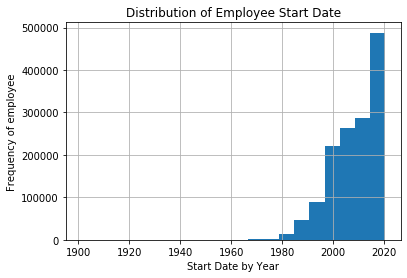

In [70]:
sal_nyc2['Agency Start Date'].hist(bins = 20)
plt.title("Distribution of Employee Start Date")
plt.xlabel("Start Date by Year")
plt.ylabel("Number of employees")

In [77]:
#find the row index of the oldest Agency Start Date for an employee
min_agency_start_date_index = sal_nyc2['Agency Start Date'].idxmin()
sal_nyc2.loc[min_agency_start_date_index]

Fiscal Year                                2020
Agency Name              DEPT OF ED PEDAGOGICAL
Last Name                                STREKO
First Name                                DAVID
Agency Start Date           1901-01-01 00:00:00
Work Location Borough                 MANHATTAN
Title Description                       TEACHER
Base Salary                              124909
Pay Basis                             per Annum
Regular Hours                                 0
Regular Gross Paid                       122243
OT Hours                                      0
Total OT Paid                                 0
Total Other Pay                         19884.5
Name: 141540, dtype: object

Text(0, 0.5, 'Frequency of employee')

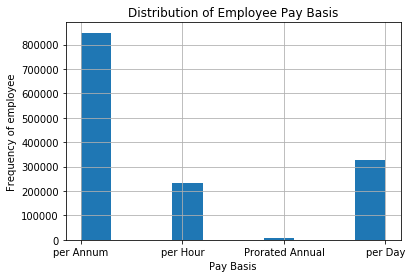

In [71]:
sal_nyc2['Pay Basis'].hist()
plt.title("Distribution of Employee Pay Basis")
plt.xlabel("Pay Basis")
plt.ylabel("Number of employees")

Text(0, 0.5, 'Frequency of employee')

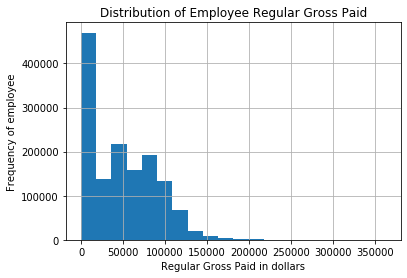

In [73]:
sal_nyc2['Regular Gross Paid'].hist(bins = 20)
plt.title("Distribution of Employee Regular Gross Paid")
plt.xlabel("Regular Gross Paid in dollars")
plt.ylabel("Number of employees")

In [78]:
#find the row index of the highest regular gross paid
max_regular_gross_paid_index = sal_nyc2['Regular Gross Paid'].idxmax()
sal_nyc2.loc[max_regular_gross_paid_index]

Fiscal Year                                        2018
Agency Name              DEPT OF ENVIRONMENT PROTECTION
Last Name                                      LAUDANDO
First Name                                  CHRISTOPHER
Agency Start Date                   1993-04-26 00:00:00
Work Location Borough                          BROOKLYN
Title Description            SENIOR STATIONARY ENGINEER
Base Salary                                      575.52
Pay Basis                                       per Day
Regular Hours                                   2045.72
Regular Gross Paid                               362522
OT Hours                                          767.5
Total OT Paid                                    153226
Total Other Pay                                     563
Name: 861520, dtype: object

Text(0, 0.5, 'Frequency of employee')

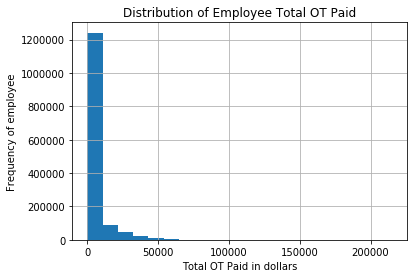

In [75]:
sal_nyc2['Total OT Paid'].hist(bins = 20)
plt.title("Distribution of Employee Total OT Paid")
plt.xlabel("Total OT Paid in dollars")
plt.ylabel("Number of employees")

In [79]:
#find the row index of the highest Total OT Paid
max_total_ot_paid_index = sal_nyc2['Total OT Paid'].idxmax()
sal_nyc2.loc[max_total_ot_paid_index]

Fiscal Year                               2020
Agency Name              NYC HOUSING AUTHORITY
Last Name                              PROCIDA
First Name                              ROBERT
Agency Start Date          1987-04-13 00:00:00
Work Location Borough                    BRONX
Title Description           SUPERVISOR PLUMBER
Base Salary                             387.03
Pay Basis                              per Day
Regular Hours                             1820
Regular Gross Paid                      100628
OT Hours                                1944.5
Total OT Paid                           215023
Total Other Pay                        6468.93
Name: 451442, dtype: object

Text(0, 0.5, 'Number of employees')

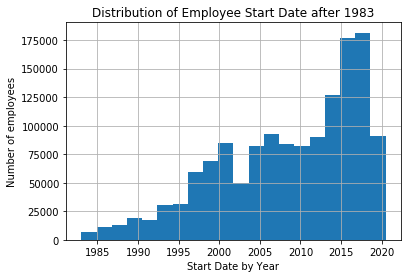

In [93]:
#filtering the 'Agency Start Date' column to year 1983
eighty_three_filter = sal_nyc2['Agency Start Date'].dt.year >= 1983
#sal_nyc2[eighty_three_filter]
nyc_sal2_eighty_three = sal_nyc2[eighty_three_filter]
nyc_sal2_eighty_three['Agency Start Date'].hist(bins = 20)
plt.title("Distribution of Employee Start Date after 1983")
plt.xlabel("Start Date by Year")
plt.ylabel("Number of employees")

Text(0, 0.5, 'Number of employees')

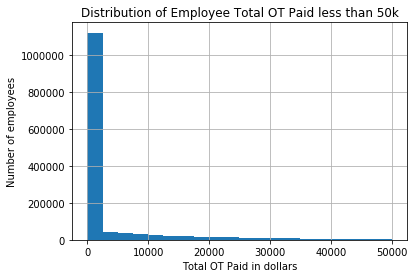

In [91]:
#filtering the 'Total OT Paid' column less than 100k
less_than_50_filter = sal_nyc2['Total OT Paid'] <= 50000
nyc_sal2_less_than_50 = sal_nyc2[less_than_60_filter]
nyc_sal2_less_than_50['Total OT Paid'].hist(bins = 20)
plt.title("Distribution of Employee Total OT Paid less than 50k")
plt.xlabel("Total OT Paid in dollars")
plt.ylabel("Number of employees")

Text(0, 0.5, 'Number of employees')

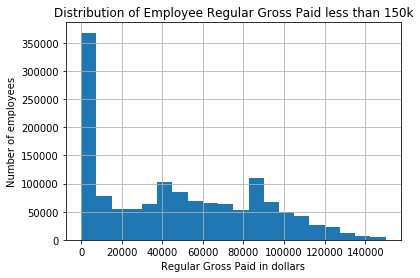

In [92]:
#filtering the 'Total OT Paid' column less than 100k
less_than_150_filter = sal_nyc2['Regular Gross Paid'] <= 150000
nyc_sal2_less_than_150 = sal_nyc2[less_than_150_filter]
nyc_sal2_less_than_150['Regular Gross Paid'].hist(bins = 20)
plt.title("Distribution of Employee Regular Gross Paid less than 150k")
plt.xlabel("Regular Gross Paid in dollars")
plt.ylabel("Number of employees")

In [94]:
sal_nyc2.columns

Index(['Fiscal Year', 'Agency Name', 'Last Name', 'First Name',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid',
       'OT Hours', 'Total OT Paid', 'Total Other Pay'],
      dtype='object')

Text(0, 0.5, 'Number of employees')

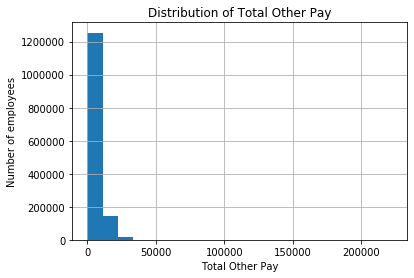

In [99]:
sal_nyc2['Total Other Pay'].hist(bins = 20)
plt.title("Distribution of Total Other Pay")
plt.xlabel("Total Other Pay")
plt.ylabel("Number of employees")

Text(0, 0.5, 'Number of employees')

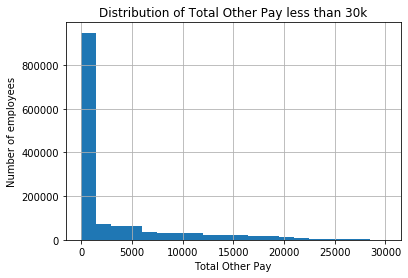

In [101]:
#filtering the 'Total Other Pay' column less than 50k
less_than_30_filter = sal_nyc2['Total Other Pay'] <= 30000
nyc_sal2_less_than_30 = sal_nyc2[less_than_30_filter]
nyc_sal2_less_than_30['Total Other Pay'].hist(bins = 20)
plt.title("Distribution of Total Other Pay less than 30k")
plt.xlabel("Total Other Pay")
plt.ylabel("Number of employees")

In [132]:
#Creating a new dataframe deleting outliers
sal_nyc3 = sal_nyc2[(sal_nyc2['Agency Start Date'].dt.year >= 1983) & \
              (sal_nyc2['Regular Gross Paid'] <= 150000) & \
              (sal_nyc2['Total OT Paid'] <= 50000) & \
              (sal_nyc2['Total Other Pay'] <= 30000) ]
sal_nyc3

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,2016-02-22,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,LUNGAYAN JR.,HERMAN,2014-05-28,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91
1469653,2019,POLICE DEPARTMENT,HORNE,JONISHAU,2018-02-20,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55
1469654,2019,POLICE DEPARTMENT,HIRA,ABDUL,2017-09-25,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37
1469655,2019,POLICE DEPARTMENT,KARAI,WAHID,2016-02-23,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69


In [109]:
# To know how many data points,features we have 
sal_nyc3.shape

(1375215, 14)

In [110]:
# describe() will tell us about statistical information of each Numerical column
sal_nyc3.describe()

,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.375215e+06,1.375215e+06,1.375215e+06,1.375215e+06,1.375215e+06,1.375215e+06,1.375215e+06
mean,2.018994e+03,4.400541e+04,7.216858e+02,4.651483e+04,6.608542e+01,3.382602e+03,3.031621e+03
std,8.126694e-01,4.134158e+04,9.108346e+02,3.856122e+04,1.535759e+02,8.231362e+03,5.433732e+03
min,2.018000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,3.318000e+01,0.000000e+00,6.156930e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,4.387800e+04,0.000000e+00,4.351152e+04,0.000000e+00,0.000000e+00,1.377000e+01
75%,2.020000e+03,8.185500e+04,1.820000e+03,7.987324e+04,1.050000e+01,4.717200e+02,3.874495e+03
max,2.020000e+03,3.450000e+05,2.936000e+03,1.499958e+05,1.799750e+03,4.999890e+04,2.999904e+04


In [111]:
sal_nyc3.describe(include = 'all')

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,1.375215e+06,1375215,1375215,1375215,1375215,1375215,1375215,1.375215e+06,1375215,1.375215e+06,1.375215e+06,1.375215e+06,1.375215e+06,1.375215e+06
unique,NaN,149,115440,64269,11309,4,1373,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,2010-01-01 00:00:00,MANHATTAN,TEACHER- PER SESSION,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,255336,9034,19794,29322,1016207,229243,NaN,821332,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,1983-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.018994e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.400541e+04,NaN,7.216858e+02,4.651483e+04,6.608542e+01,3.382602e+03,3.031621e+03
std,8.126694e-01,NaN,NaN,NaN,NaN,NaN,NaN,4.134158e+04,NaN,9.108346e+02,3.856122e+04,1.535759e+02,8.231362e+03,5.433732e+03
min,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,6.156930e+03,0.000000e+00,0.000000e+00,0.000000e+00


Inferences:
There are 14 attributes with 1,375,215 records. Employees' first name and last name are unique for everyone and will not carry any weightage to the analysis therefore they can be dropped

In [134]:
sal_nyc3.drop(['Last Name','First Name'],axis=1,inplace=True)
sal_nyc3.head()

C:\Users\Chiqui\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,OFFICE OF EMERGENCY MANAGEMENT,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,OFFICE OF EMERGENCY MANAGEMENT,2016-02-22,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,OFFICE OF EMERGENCY MANAGEMENT,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,OFFICE OF EMERGENCY MANAGEMENT,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [113]:
#Looking for any extra missing values
sal_nyc3.isnull().sum()

Fiscal Year              0
Agency Name              0
Agency Start Date        0
Work Location Borough    0
Title Description        0
Base Salary              0
Pay Basis                0
Regular Hours            0
Regular Gross Paid       0
OT Hours                 0
Total OT Paid            0
Total Other Pay          0
dtype: int64

In [116]:
sal_nyc3['Pay Basis'].value_counts()

per Annum          821332
per Day            316685
per Hour           231865
Prorated Annual      5333
Name: Pay Basis, dtype: int64

In [118]:
sal_nyc3['Title Description'].value_counts()

TEACHER- PER SESSION                                     229243
TEACHER                                                  145887
ELECTION WORKER                                           99683
ANNUAL ED PARA                                            73527
POLICE OFFICER                                            66967
                                                          ...  
NYCAPS PROCESS ANALYST MANAGER                                1
DIRECTOR OF GENERAL SERVICES                                  1
ASSISTANT TO THE COMPTROLLER                                  1
UNIVERSITY ENGINEER                                           1
ASSISTANT TO THE COMMISSIONER OF PARKS AND RECREATION         1
Name: Title Description, Length: 1373, dtype: int64

#sal_nyc3['Title Description'] = sal_nyc3['Title Description'].astype('category').cat.codes
#sal_nyc3.head()

In [135]:
sal_nyc3['Start_Year'] = sal_nyc3['Agency Start Date'].dt.year
sal_nyc3.head()

C:\Users\Chiqui\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Start_Year
0,2020,OFFICE OF EMERGENCY MANAGEMENT,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,2015
1,2020,OFFICE OF EMERGENCY MANAGEMENT,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,2016
2,2020,OFFICE OF EMERGENCY MANAGEMENT,2016-02-22,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,2016
3,2020,OFFICE OF EMERGENCY MANAGEMENT,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,2013
4,2020,OFFICE OF EMERGENCY MANAGEMENT,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,2018


Text(0.5, 1, 'Regular Gross Paid of Employee vs Fiscal Year')

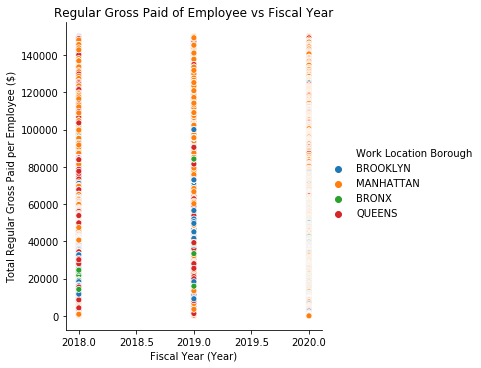

In [121]:
sns.relplot(x='Fiscal Year', y='Regular Gross Paid',\
            hue='Work Location Borough',data=sal_nyc3)
plt.xlabel("Fiscal Year (Year)")
plt.ylabel("Total Regular Gross Paid per Employee ($)")
plt.title("Regular Gross Paid of Employee vs Fiscal Year")

We notice that regular gross paid(per employee) is highest for Manhattan. We also notice that regular gross paid(per employee) is at a moderate level for Queens. Moreover, we also notice that, over the years  regular gross paid(per employee) for Queens is decreasing. We also notice that  regular gross paid(per employee) for Brooklyn and Bronx has increased in the 2019 compared to 2018.

Conclusions: The  regular gross paid(per employee) for Manhattan is the highest followed by Brooklyn while Bronx and Queens fall on the lower end.

Text(0.5, 1, 'Regular Gross Paid of Employee vs Start Year')

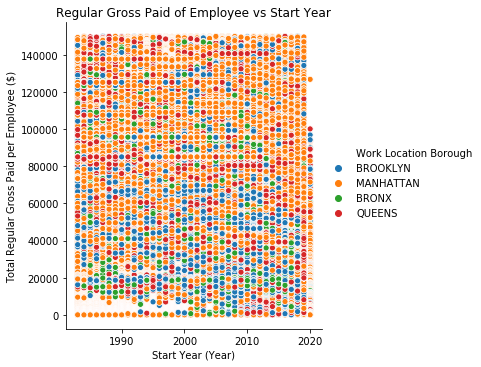

In [124]:
sns.relplot(x='Start_Year', y='Regular Gross Paid',\
            hue='Work Location Borough',data=sal_nyc3)
plt.xlabel("Start Year (Year)")
plt.ylabel("Total Regular Gross Paid per Employee ($)")
plt.title("Regular Gross Paid of Employee vs Start Year")

We notice that historically Manhattan has had the highest gross paid salary for it's people. While few employees in Queens and Brooklyn also have a higher gross salary, it hasn't been consistent thoughout the years. Based on the overall years, we also notice that Brooklyn and Queens have a moderate gross salary and Bronx has the lowest gross paid salary.

Conclusions: Manhattan has the highest gross paid salary thoughout the years. Even though historically Brooklyn and Queens have a moderate gross salary, it has been decreasing over the years and is quite low for the years 2018,2019 and 2020. Majority of Bronx still has the lowest gross salary paid.

Text(0.5, 1, 'Total OT Paid vs Fiscal Year')

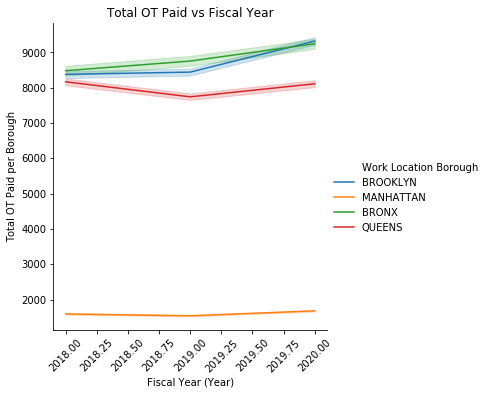

In [128]:
sns.relplot(x='Fiscal Year', y='Total OT Paid',\
            hue='Work Location Borough',data=sal_nyc3, kind = 'line')
plt.xticks(rotation=45)
plt.xlabel("Fiscal Year (Year)")
plt.ylabel("Total OT Paid per Borough")
plt.title("Total OT Paid vs Fiscal Year")

We notice that Overtime(OT) paid is highest for Bronx and has been increasing over the years. The OT for Brooklyn comes at the second place. But, in the past few months leading to 2020 the OT for Brooklyn has surpassed Bronx. The OT for Queens comes at the third place. While it had decreased from 2018 to 2019, it is on a growing scale from 2019 to 2020. Finally, even though Manhattan has the highest gross and salary per employee, the OT for Manhattan is significantly lower than other states. It has dipped and grown from 2018 to 2020 but the OT has remained nearly contsant over the years.

Conclusions: Bronx has the highest OT but Brooklyn has surpassed it in the last few months. On the third place comes Queens. Finally, Manhattan has the lowest OT compared to all other states.

 a) Choose a column in your dataset to predict using some or all of the other columns.. This can either be a quantitative column to perform regression on, or a qualitative column to perform classification on.

In [129]:
sal_nyc3.columns

Index(['Fiscal Year', 'Agency Name', 'Agency Start Date',
       'Work Location Borough', 'Title Description', 'Base Salary',
       'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours',
       'Total OT Paid', 'Total Other Pay', 'Start_Year'],
      dtype='object')

In [136]:
#Renaming columns
new_columns = ['Fiscal _Year', 'Agency_Name', 'Agency_Start_Date',\
       'Work_Location', 'Title_Description', 'Base_Salary',\
       'Pay_Basis', 'Regular_Hours', 'Regular_Gross_Paid', 'OT_Hours',\
       'Total_OT_Paid', 'Total_Other_Pay', 'Start_Year']
sal_nyc3.columns = new_columns
sal_nyc3

,Fiscal _Year,Agency_Name,Agency_Start_Date,Work_Location,Title_Description,Base_Salary,Pay_Basis,Regular_Hours,Regular_Gross_Paid,OT_Hours,Total_OT_Paid,Total_Other_Pay,Start_Year
0,2020,OFFICE OF EMERGENCY MANAGEMENT,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,2015
1,2020,OFFICE OF EMERGENCY MANAGEMENT,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,2016
2,2020,OFFICE OF EMERGENCY MANAGEMENT,2016-02-22,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,2016
3,2020,OFFICE OF EMERGENCY MANAGEMENT,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,2013
4,2020,OFFICE OF EMERGENCY MANAGEMENT,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,86005.0,per Annum,1820.0,84698.21,0.00,0.00,0.00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469652,2019,POLICE DEPARTMENT,2014-05-28,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,39449.0,per Annum,2040.0,39032.61,306.50,9242.39,4182.91,2014
1469653,2019,POLICE DEPARTMENT,2018-02-20,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,39453.0,per Annum,1785.0,38539.44,245.55,7163.58,3680.55,2018
1469654,2019,POLICE DEPARTMENT,2017-09-25,BRONX,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,38986.0,per Annum,2040.0,38763.31,269.00,7979.68,1031.37,2017
1469655,2019,POLICE DEPARTMENT,2016-02-23,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,51700.0,per Annum,1785.0,49625.00,255.32,9214.59,8692.69,2016


In [137]:
sal_nyc3.columns

Index(['Fiscal _Year', 'Agency_Name', 'Agency_Start_Date', 'Work_Location',
       'Title_Description', 'Base_Salary', 'Pay_Basis', 'Regular_Hours',
       'Regular_Gross_Paid', 'OT_Hours', 'Total_OT_Paid', 'Total_Other_Pay',
       'Start_Year'],
      dtype='object')

In [142]:
lm = smf.ols('Regular_Gross_Paid ~ Total_OT_Paid + Total_Other_Pay',\
            data = sal_nyc3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Regular_Gross_Paid   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                 1.934e+05
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        11:46:50   Log-Likelihood:            -1.6303e+07
No. Observations:             1375215   AIC:                         3.261e+07
Df Residuals:                 1375212   BIC:                         3.261e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.632e+04     33.360   1088.645      0.000    3.63e+04    3.64e+04
Total_OT_Paid       0.3579      0.004     80.038      0.000       0.349       0.367
Total_Other_Pay     2.9645      0.007    437.579      0.000       2.951       2.978
==============================================================================
Omnibus:                   127516.457   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167172.848
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                       2.990   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""